In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


In [2]:
book = pd.read_csv("book.csv", encoding= 'Latin1')

book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
#Rename the columns
book.rename({'Unnamed: 0':'index','User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},
              axis= 1, inplace= True)
book.set_index('index', inplace= True)
book_copy = book.copy()
book.head()

,User_ID,Book_Title,Book_Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [4]:
book.shape

(10000, 3)

In [5]:
book.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [7]:
book['Book_Rating'].describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Book_Rating, dtype: float64

In [8]:
book['Book_Rating'].value_counts()

Book_Rating
8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: count, dtype: int64

In [9]:
#Unique users
len(book['User_ID'].unique())

2182

In [10]:
# Unique Books
len(book['Book_Title'].unique())

9659

In [11]:
ratings = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].mean())
ratings.head()

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


##### Visualization

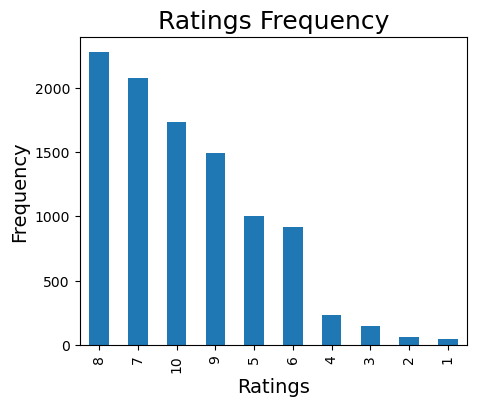

In [12]:
plt.figure(figsize=(5,4))
book['Book_Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency', fontsize = 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

Most Frequent Ratings by Users are: 8, 7 and 10

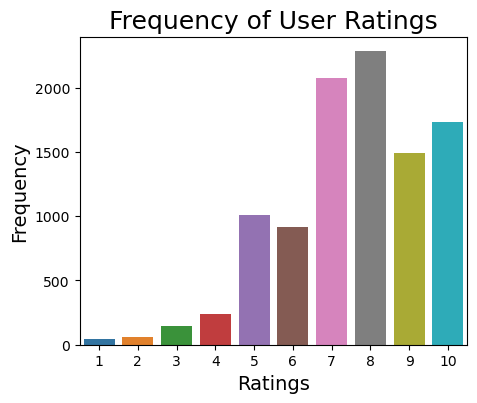

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(data=book, x='Book_Rating')
plt.title("Frequency of User Ratings", fontsize= 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)
plt.show()

#### Collaborative Book Recommendation System

In [14]:
book_df = book.pivot_table(index= 'User_ID', columns= 'Book_Title', values= 'Book_Rating')
book_df.fillna(0,inplace=True)
book_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


##### Calculating Cosine Similarity Between Users

In [15]:
ratings['No_of_Ratings'] = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].count())
ratings.head()

,Book_Rating,No_of_Ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [16]:
ratings.sort_values('No_of_Ratings', ascending= False).head(10)

,Book_Rating,No_of_Ratings
Book_Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [17]:
stardust_user_rating = book_df['Stardust']
fahrenheit_user_rating = book_df['Fahrenheit 451']
fahrenheit_user_rating.head()

User_ID
8     0.0
9     0.0
10    0.0
12    0.0
14    0.0
Name: Fahrenheit 451, dtype: float64

In [18]:
similar_to_fahrenheit = book_df.corrwith(fahrenheit_user_rating)
similar_to_stardust = book_df.corrwith(stardust_user_rating)

In [19]:
corr_fahrenheit = pd.DataFrame(similar_to_fahrenheit, columns= ['Correlation'])
corr_fahrenheit.dropna(inplace= True)
corr_fahrenheit.head()

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [20]:
corr_fahrenheit.sort_values('Correlation', ascending= False).head(10)

,Correlation
Book_Title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
A la vora del pou (El BalancÃ­),0.596326
Les illes grogues: Tres novelÂ¨les romÃ ntiques (El BalancÃ­),0.596326
The Ambassador's Women,0.596326
"Dream Country (Sandman, Book 3)",0.596326
"For The Love Of Beau (Delta Justice) (Delta Justice , No 9)",0.596326
"Father Of Two (The Daddy School) (Harlequin Superromance, No 771)",0.596326
Silent Witness,0.596326


In [21]:
corr_fahrenheit = corr_fahrenheit.join(ratings['Book_Rating'])
corr_fahrenheit.head()

,Correlation,Book_Rating
Book_Title,,
"Jason, Madison &amp",-0.000958,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000958,6.0
Repairing PC Drives &amp,-0.000958,4.0
'48,-0.000958,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958,8.0


Recommending Similar Books Using Correlation Based on Ratings

In [22]:
corr_fahrenheit[corr_fahrenheit['Book_Rating']>5].sort_values('Correlation', ascending= False).head()

,Correlation,Book_Rating
Book_Title,,
Fahrenheit 451,1.000000,7.0
The Day I Swapped My Dad for 2 Goldfish,0.596326,9.0
"Julia (Circle Of Friends) (Harlequin Superromance, 813)",0.596326,7.0
The Princess Bride: S. Morgenstern's Classic Tale of True Love and High Adventure (The 'Good Parts' Version),0.596326,7.0
Contes de fÃ?Â©es Ã?Â l'usage des moyennes personnes,0.596326,7.0


In [23]:
corr_stardust = pd.DataFrame(similar_to_stardust, columns= ['Correlation'])
corr_stardust.dropna(inplace= True)
corr_stardust = corr_stardust.join(ratings['No_of_Ratings'])
corr_stardust[corr_stardust['No_of_Ratings']>4].sort_values('Correlation', ascending= False).head()

,Correlation,No_of_Ratings
Book_Title,,
Fahrenheit 451,-0.001908,5


#### Collaborative Recommender System Using Cosine Similarity
Calculating Cosine Similarity Between Users

In [24]:
user_sim=1-pairwise_distances(book_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [26]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [27]:
#Set the index and column name to User IDs
user_sim_df.index = list(book_df.index)
user_sim_df.columns = list(book_df.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
book_copy[(book_copy['User_ID']==8) | (book_copy['User_ID']==14)]

,User_ID,Book_Title,Book_Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [29]:
#Most Similar users
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [30]:
book_copy[(book_copy['User_ID']==8) | (book_copy['User_ID']==14)]

,User_ID,Book_Title,Book_Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [31]:
book_copy[book_copy['User_ID']==14]

,User_ID,Book_Title,Book_Rating
index,,,
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5
2412,14,Dead Sleep,6


In [32]:
def give_recommendation(customer_id):
    temp = list(user_sim_df.sort_values([customer_id], ascending= False).head().index)
    books_list = []
    
    for i in temp:
        books_list = books_list + list(book_copy[book_copy['User_ID']==i]['Book_Title'])    
    return set(books_list)-set(book_copy[book_copy['User_ID']==customer_id]['Book_Title'])

In [33]:
give_recommendation(14)

{'After All These Years',
 'Ancient Celtic Romances',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Keepers of the Earth Teachers Guide',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of 

In [34]:
give_recommendation(8)

{'After All These Years',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of Age in the Bronx',
 'Send in the Stunt Mom: The Second Collection of